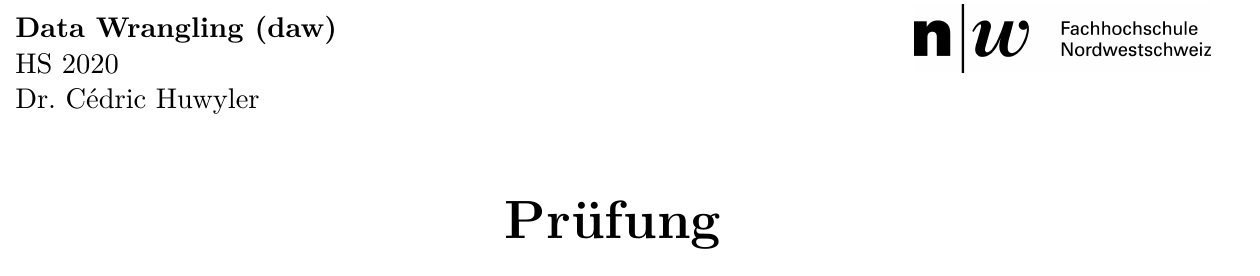

Versionsinfo über Pandas, Numpy und Scikit-Learn:

In [4]:
import pandas as pd
import numpy as np
import sklearn
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Scikit-Learn {}".format(sklearn.__version__))

Pandas 1.1.0
Numpy 1.19.1
Scikit-Learn 0.24.2


## Aufgabe 1: Data Wrangling Basics (27 Punkte)

In der Datei `'tips.csv'` finden Sie einen Datensatz mit Erhebungen einer Bar. Darin enthalten sind pro Tisch: totaler Rechnungsbetrag, Trinkgeldbetrag, Angabe Raucher/Nicht-Raucher, Wochentag, Tageszeit und Gruppengrösse.

### a) (1 Punkt)

Importieren Sie das Datenset in ein Data Frame.

In [5]:
tips = pd.read_csv("DAW_Exam_Material/tips.csv")
tips.head()

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4

### b) (6 Punkte)

Beschreiben Sie die Datentypen der verschiedenen Merkmale: Welche sind diskret und welche stetig? Welche der Merkmale davon sind nominal-, ordinal-, intervall- und welche verhältnisskaliert? 

### Lösung

**total_bill**: stetig, verhältnisskaliert

**tip**: stetig, verhältnisskaliert

**smoker**: diskret, nominalskaliert

**day**: diskret, ordinalskaliert, oder eigentlich sogar intervallskaliert

**time**: diskret, ordinalskaliert

**size**: diskret, ordinalskaliert, oder eigentlich sogar verhältnisskaliert

### c) (2 Punkte)

Geben Sie ein Beispiel eines stetigen, aber nicht verhältnisskalierten Merkmals an und erklären Sie kurz:

### Lösung

Temperatur, Jahr, .. Verdoppelung macht keinen Sinn, 20 Grad ist nicht doppelt so warm wie 10 Grad, .., darum nicht verhältnisskaliert. Trotzdem sind die Abstände zwischen den Schritten interpretierbar und jeweils gleich gross.

### d) (6 Punkte)

Zurück zum erstellten Data Frame. Formatieren Sie die diskreten Variablen wo nötig als \textit{kategorische} Variablen. Dabei soll die Variable im resultierenden Data Frame über die verschiedenen Ausprägungen des Merkmals Bescheid wissen und wo möglich auch die Bedeutung der Ordnungsrelationen $<$ und $>$ verstehen können.

### Lösung

In [3]:
tips.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [4]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [5]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [6]:
tips.smoker = pd.Categorical(tips.smoker, categories=['No', 'Yes'], ordered=False)
tips.day = pd.Categorical(tips.day, categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)
tips.time = pd.Categorical(tips.time, categories=['Dinner', 'Lunch'], ordered=False)

### e) (6 Punkte)

An welchem Wochentag nahm die Bar durchschnittlich prozentual am meisten Trinkgeld ein? Gib ein informatives Data Frame aus und unterlege deine Antwort mit einem Barplot. Die Wochentage sollen dabei in der korrekten Reihenfolge angeordnet sein.

### Lösung

In [7]:
tips['percent_tip'] = tips.tip / tips.total_bill * 100
tips_per_day = tips.groupby("day").percent_tip.mean()
tips_per_day

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: percent_tip, dtype: float64

<AxesSubplot:xlabel='day'>

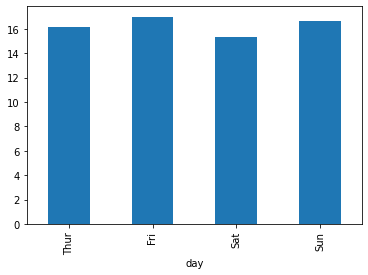

In [9]:
tips_per_day.plot.bar()

### f) (6 Punkte)

Wie hängt die prozentuale Trinkgeldhöhe qualitativ mit der Gruppengrösse zusammen? Beurteilen Sie mit einem Boxplot der Trinkgeldhöhe pro Gruppengrösse (alle Boxplots in einem Plot). Geben Sie zur Sicherheit auch die Verteilung der Gruppengrössen an - spielt diese bei Ihrer Beurteilung eine Rolle?

### Lösung

<AxesSubplot:title={'center':'percent_tip'}, xlabel='size'>

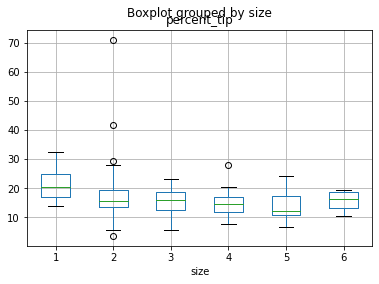

In [10]:
tips.boxplot("percent_tip", by="size")

In [11]:
tips.groupby("size").size()

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

Es scheint so, als würden Einzelpersonen prozentual mehr Trinkgeld geben. Aber es gibt nur sehr wenige Einzelpersonen, darum handelt es sich hier möglicherweise eher um einen Ausreisser und es kann keine Aussage gemacht werden.

## Aufgabe 2: Diabetes-Risiko (26 Punkte)

In den zur Verfügung gestellten Dateien finden Sie die Excel-Datei 'diabetes.xlsx' mit einem Datenset und einer Beschreibung dazu in den verschiedene Sheets.

### a) (1 Punkt)

Lesen Sie die Beschreibung und importieren Sie das Datenset in ein Data Frame.

### Lösung

In [12]:
df = pd.read_excel("DAW_Exam_Material/diabetes.xlsx", sheet_name="data")
df.head()

/home/chuwyler/.conda/envs/python3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


n_pregnant  gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1   85              66                           29        0   
1           8  183              64                            0        0   
2           1   89              66                           23       94   
3           0  137              40                           35      168   
4           5  116              74                            0        0   

    bmi    dpf  age  class  
0  26.6  0.351   31      0  
1  23.3  0.672   32      1  
2  28.1  0.167   21      0  
3  43.1  2.288   33      1  
4  25.6  0.201   30      0

### b)

Enthält das Datenset fehlende Werte? Untersuchen Sie die Wertebereiche der einzelnen Spalten genau. Stellen Sie sicher, dass alle klar erkennbaren fehlenden Werte mit `NaN` auch als solche gekennzeichnet sind. Geben Sie die Anzahl der fehlenden Werte pro Spalte absolut und in Prozent aus.

### Lösung

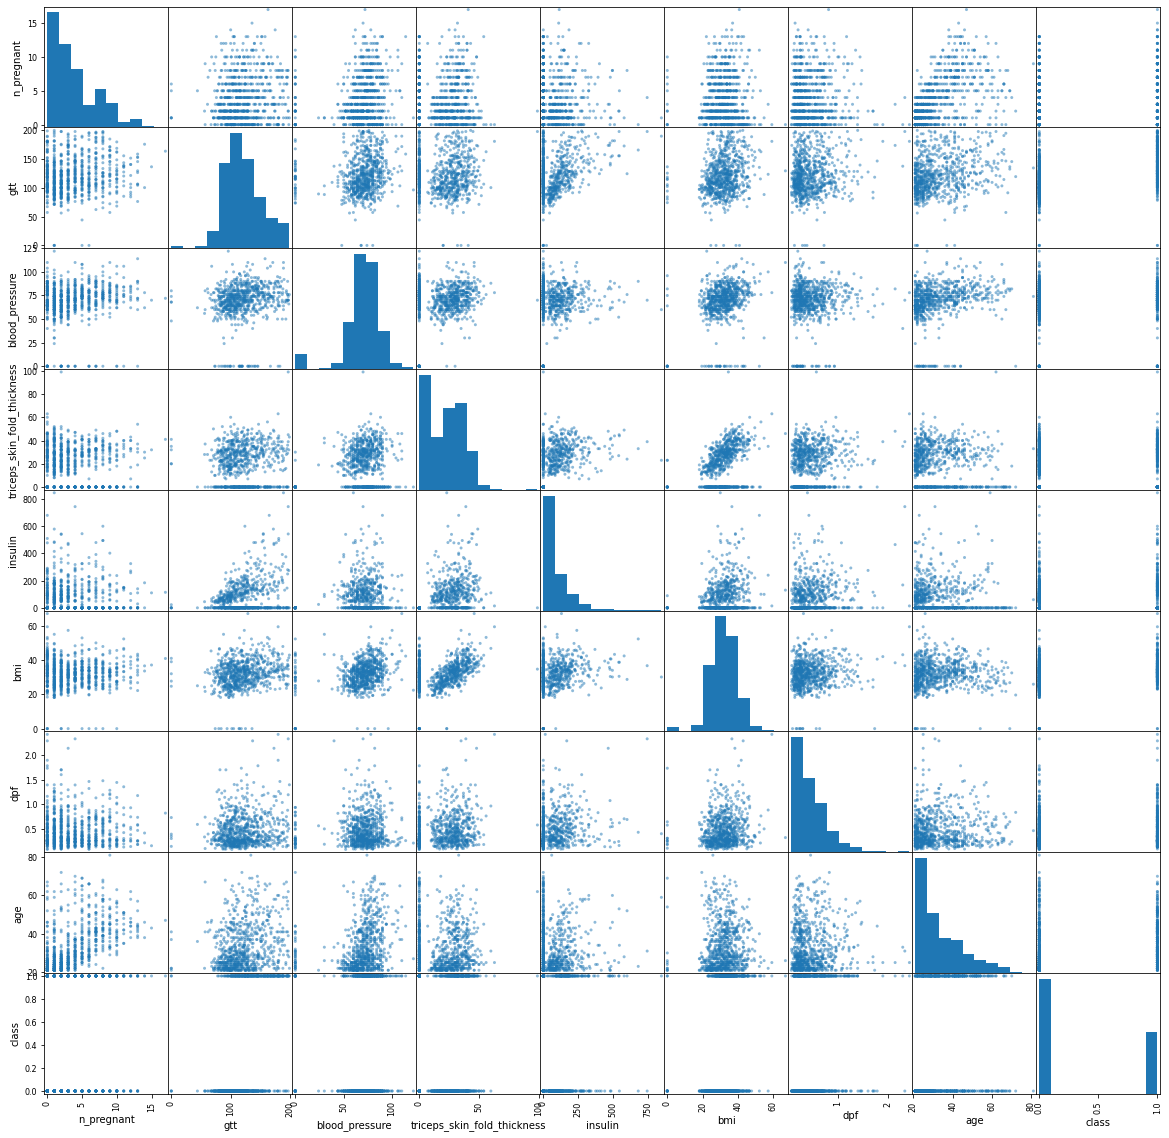

In [13]:
res = pd.plotting.scatter_matrix(df, figsize=(20,20))

Fehlende Werte sind in `gtt`, `blood_pressure`, `triceps_skin_fold_thickness` und `bmi` mit einer Null gekennzeichnet. Im Rest haben Nullwerte eine Bedeutung und sind keine fehlenden Werte.

In [14]:
for key in ["gtt", "blood_pressure", "triceps_skin_fold_thickness", "bmi"]:
    df[key] = df[key].replace(0, np.nan)
    
df.head()

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1   85.0            66.0                         29.0        0   
1           8  183.0            64.0                          NaN        0   
2           1   89.0            66.0                         23.0       94   
3           0  137.0            40.0                         35.0      168   
4           5  116.0            74.0                          NaN        0   

    bmi    dpf  age  class  
0  26.6  0.351   31      0  
1  23.3  0.672   32      1  
2  28.1  0.167   21      0  
3  43.1  2.288   33      1  
4  25.6  0.201   30      0

In [15]:
df.isna().sum()

n_pregnant                       0
gtt                              5
blood_pressure                  35
triceps_skin_fold_thickness    227
insulin                          0
bmi                             11
dpf                              0
age                              0
class                            0
dtype: int64

In [16]:
(df.isna().mean() * 100).round(1)

n_pregnant                      0.0
gtt                             0.7
blood_pressure                  4.6
triceps_skin_fold_thickness    29.6
insulin                         0.0
bmi                             1.4
dpf                             0.0
age                             0.0
class                           0.0
dtype: float64

In [17]:
df.head()

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1   85.0            66.0                         29.0        0   
1           8  183.0            64.0                          NaN        0   
2           1   89.0            66.0                         23.0       94   
3           0  137.0            40.0                         35.0      168   
4           5  116.0            74.0                          NaN        0   

    bmi    dpf  age  class  
0  26.6  0.351   31      0  
1  23.3  0.672   32      1  
2  28.1  0.167   21      0  
3  43.1  2.288   33      1  
4  25.6  0.201   30      0

### c) (1 Punkt)

Erklären Sie kurz, warum wir das komplette Entfernen der Samples mit fehlenden Werten vermeiden möchten und lieber eine passende Imputationsstrategie wählen.

### Lösung

Bei `triceps_skin_fold_thickness` fehlen fast 30% der Werte, darum würden wir sehr viele Samples verlieren. In Anbetracht der relativ geringen Anzahl von Samples  möchten wir lieber darauf verzichten.

### d) (6 Punkte)

Erstellen Sie ein neues Data Frame und wenden Sie folgenden Strategien an:

* `gtt` und `triceps_skin_fold_thickness`: Imputation mit Median
* `blood_pressure` und `bmi`: Imputation mit Durchschnitt

Stellen Sie am Schluss sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

### Lösung

In [19]:
df2 = df.copy()

In [20]:
df2.gtt = df2.gtt.fillna( df2.gtt.median() )
df2.triceps_skin_fold_thickness = df2.triceps_skin_fold_thickness.fillna( df2.triceps_skin_fold_thickness.median() )
df2.blood_pressure = df2.blood_pressure.fillna( df2.blood_pressure.mean() )
df2.bmi = df2.bmi.fillna( df2.bmi.mean() )

In [21]:
df2

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0             1   85.0            66.0                         29.0        0   
1             8  183.0            64.0                         29.0        0   
2             1   89.0            66.0                         23.0       94   
3             0  137.0            40.0                         35.0      168   
4             5  116.0            74.0                         29.0        0   
..          ...    ...             ...                          ...      ...   
762          10  101.0            76.0                         48.0      180   
763           2  122.0            70.0                         27.0        0   
764           5  121.0            72.0                         23.0      112   
765           1  126.0            60.0                         29.0        0   
766           1   93.0            70.0                         31.0        0   

      bmi    dpf  age  class  
0    26.6  0.351   31      0  
1    23.3  0.672   32      1  
2    28.1  0.167   21      0  
3    43.1  2.288   33      1  
4    25.6  0.201   30      0  
..    ...    ...  ...    ...  
762  32.9  0.171   63      0  
763  36.8  0.340   27      0  
764  26.2  0.245   30      0  
765  30.1  0.349   47      1  
766  30.4  0.315   23      0  

[767 rows x 9 columns]

In [22]:
df2.isna().any()

n_pregnant                     False
gtt                            False
blood_pressure                 False
triceps_skin_fold_thickness    False
insulin                        False
bmi                            False
dpf                            False
age                            False
class                          False
dtype: bool

### e) (4 Punkte)

Alternativ können fehlende Werte auch modellbasiert ersetzt werden. Dazu soll ein *k nearest neighbours* (KNN) - Modell verwendet werden (mit `n_neighbours=5`). Verwenden Sie dazu die Klasse `sklearn.impute.KNNImputer` von Scikit-Learn.

Stellen Sie auch hier sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

**Hinweis:** Natürlich sollte die Variable `class` nicht als Grundlage zur Imputation benutzt werden, da sonst Information darüber in die unabhängigen Variablen leakt.

### Lösung

In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df3 = pd.DataFrame(imputer.fit_transform(df.drop("class", axis=1)), columns = df.columns[:-1])
df3['class'] = df['class']
df3

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1.0   85.0            66.0                         29.0      0.0   
1           8.0  183.0            64.0                         33.0      0.0   
2           1.0   89.0            66.0                         23.0     94.0   
3           0.0  137.0            40.0                         35.0    168.0   
4           5.0  116.0            74.0                         28.8      0.0   
..          ...    ...             ...                          ...      ...   
762        10.0  101.0            76.0                         48.0    180.0   
763         2.0  122.0            70.0                         27.0      0.0   
764         5.0  121.0            72.0                         23.0    112.0   
765         1.0  126.0            60.0                         33.2      0.0   
766         1.0   93.0            70.0                         31.0      0.0   

      bmi    dpf   age  class  
0    26.6  0.351  31.0      0  
1    23.3  0.672  32.0      1  
2    28.1  0.167  21.0      0  
3    43.1  2.288  33.0      1  
4    25.6  0.201  30.0      0  
..    ...    ...   ...    ...  
762  32.9  0.171  63.0      0  
763  36.8  0.340  27.0      0  
764  26.2  0.245  30.0      0  
765  30.1  0.349  47.0      1  
766  30.4  0.315  23.0      0  

[767 rows x 9 columns]

### f) (7 Punkte)

Wir möchten zum Schluss auf dem imputierten Datenset aus Teilaufgabe (e) untersuchen, ob und wie stark Fettleibigkeit zum Diabetesrisiko beiträgt. Erstellen Sie dazu eine neue Spalte `bmi_class` mit der folgenden Einteilung:

$$
\text{bmi_class} = \left\{ \begin{array}{ll}
\text{'underweight'}, & \text{bmi} < 18.5 \\
\text{'normal'}, & 18.5 \leq \text{bmi} < 25 \\
\text{'overweight'}, & 25 \leq \text{bmi} < 30 \\
\text{'obese'}, & \text{bmi} \geq 30 
\end{array}\right.
$$

Die Spalte soll über die Ordinalskala der BMI-Klasse informiert sein.

Berechnen Sie nun das mittlere Diabetesrisiko und die Anzahl der Probanden pro BMI-Klasse. Was ist ihre Schlussfolgerung?

### Lösung

In [24]:
df3['bmi_class'] = pd.cut(
    df3.bmi, bins=[0,18.5,25,30,100], labels=['underweight', 'normal', 'overweight', 'obese'], right=False
)

In [25]:
df3.groupby('bmi_class')['class'].agg(['mean', 'size'])

mean  size
bmi_class                  
underweight  0.000000     4
normal       0.067961   103
overweight   0.221622   185
obese        0.461053   475

## Aufgabe 3: Hierarchisch strukturierte Daten

Das *Gapminder*-Datenset enthält Daten zum Bruttoinlandprodukt (BIP) pro Kopf (engl. GDP per capita), zur Lebenserwartung (eng. life expectancy) und zur Bevölkerungsgrösse (engl. population) von 142 Ländern auf 5 Kontinenten.

In `gapminder.json` finden Sie ein verschachteltes JSON-Datenset. Dabei ist das oberste Hierarchielevel der Kontinent, das zweitoberste das Land und die relevanten Grössen finden sich schliesslich in der dritten Hierarchiestufe.

### a)

Lesen Sie das Json-File als Dictionary ein und bringen Sie es in die Form eines flachen Data Frames:

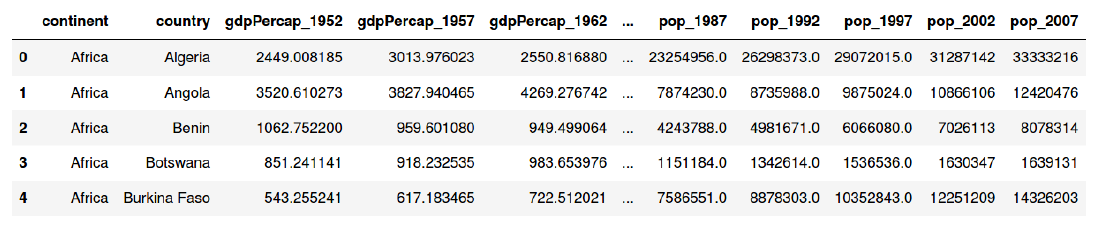

**Hinweis:** Das geht zum Beispiel mit zwei verschachtelten `for`-Loops.

### Lösung

JSON einlesen:

(mit `json`)

In [26]:
import json
json1_file = open('DAW_Exam_Material/gapminder.json')
json1_str = json1_file.read()
jd = json.loads(json1_str)
jd

{'Africa': {'Algeria': {'gdpPercap_1952': 2449.008185,
   'gdpPercap_1957': 3013.976023,
   'gdpPercap_1962': 2550.81688,
   'gdpPercap_1967': 3246.991771,
   'gdpPercap_1972': 4182.663766,
   'gdpPercap_1977': 4910.416756,
   'gdpPercap_1982': 5745.160213,
   'gdpPercap_1987': 5681.358539,
   'gdpPercap_1992': 5023.216647,
   'gdpPercap_1997': 4797.295051,
   'gdpPercap_2002': 5288.040382,
   'gdpPercap_2007': 6223.367465,
   'lifeExp_1952': 43.077,
   'lifeExp_1957': 45.685,
   'lifeExp_1962': 48.303,
   'lifeExp_1967': 51.407,
   'lifeExp_1972': 54.518,
   'lifeExp_1977': 58.014,
   'lifeExp_1982': 61.368,
   'lifeExp_1987': 65.799,
   'lifeExp_1992': 67.744,
   'lifeExp_1997': 69.152,
   'lifeExp_2002': 70.994,
   'lifeExp_2007': 72.301,
   'pop_1952': 9279525.0,
   'pop_1957': 10270856.0,
   'pop_1962': 11000948.0,
   'pop_1967': 12760499.0,
   'pop_1972': 14760787.0,
   'pop_1977': 17152804.0,
   'pop_1982': 20033753.0,
   'pop_1987': 23254956.0,
   'pop_1992': 26298373.0,
   'po

(mit `pandas`)

In [27]:
jd = pd.read_json('DAW_Exam_Material/gapminder.json', typ="series").to_dict()

Data Frame flach machen:

In [28]:
dicts = []
for continent in jd.keys():
    for country in jd[continent].keys():
        d = {'continent': continent, 'country': country}
        d.update( jd[continent][country] )
        dicts.append(d)
        
df = pd.DataFrame.from_dict( dicts )
df.head()

continent       country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Africa       Algeria     2449.008185     3013.976023     2550.816880   
1    Africa        Angola     3520.610273     3827.940465     4269.276742   
2    Africa         Benin     1062.752200      959.601080      949.499064   
3    Africa      Botswana      851.241141      918.232535      983.653976   
4    Africa  Burkina Faso      543.255241      617.183465      722.512021   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     3246.991771     4182.663766     4910.416756     5745.160213   
1     5522.776375     5473.288005     3008.647355     2756.953672   
2     1035.831411     1085.796879     1029.161251     1277.897616   
3     1214.709294     2263.611114     3214.857818     4551.142150   
4      794.826560      854.735976      743.387037      807.198586   

   gdpPercap_1987  ...    pop_1962    pop_1967    pop_1972    pop_1977  \
0     5681.358539  ...  11000948.0  12760499.0  14760787.0  17152804.0   
1     2430.208311  ...   4826015.0   5247469.0   5894858.0   6162675.0   
2     1225.856010  ...   2151895.0   2427334.0   2761407.0   3168267.0   
3     6205.883850  ...    512764.0    553541.0    619351.0    781472.0   
4      912.063142  ...   4919632.0   5127935.0   5433886.0   5889574.0   

     pop_1982    pop_1987    pop_1992    pop_1997  pop_2002  pop_2007  
0  20033753.0  23254956.0  26298373.0  29072015.0  31287142  33333216  
1   7016384.0   7874230.0   8735988.0   9875024.0  10866106  12420476  
2   3641603.0   4243788.0   4981671.0   6066080.0   7026113   8078314  
3    970347.0   1151184.0   1342614.0   1536536.0   1630347   1639131  
4   6634596.0   7586551.0   8878303.0  10352843.0  12251209  14326203  

[5 rows x 38 columns]

### b)

Bringen Sie nun das Data Frame in die folgende Form:

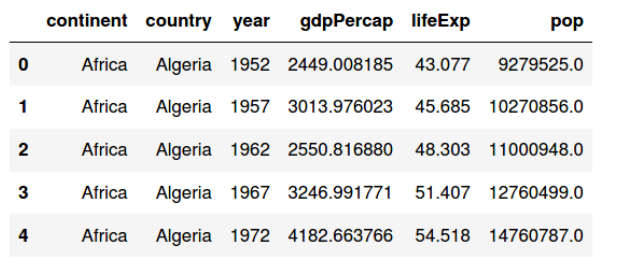

In [29]:
df = df.melt( id_vars=['continent', 'country'])
df.head()

continent       country        variable        value
0    Africa       Algeria  gdpPercap_1952  2449.008185
1    Africa        Angola  gdpPercap_1952  3520.610273
2    Africa         Benin  gdpPercap_1952  1062.752200
3    Africa      Botswana  gdpPercap_1952   851.241141
4    Africa  Burkina Faso  gdpPercap_1952   543.255241

In [30]:
var_value_df = df.variable.str.split('_', expand=True)
var_value_df.columns = ['measure', 'year']
df = pd.concat([df, var_value_df], axis=1)
df = df.drop('variable', axis=1)
df.head()

continent       country        value    measure  year
0    Africa       Algeria  2449.008185  gdpPercap  1952
1    Africa        Angola  3520.610273  gdpPercap  1952
2    Africa         Benin  1062.752200  gdpPercap  1952
3    Africa      Botswana   851.241141  gdpPercap  1952
4    Africa  Burkina Faso   543.255241  gdpPercap  1952

In [31]:
df = df.pivot(index=['continent', 'country', 'year'], columns='measure', values='value')
df.columns.name = ""
df = df.reset_index()
df.head()

continent  country  year    gdpPercap  lifeExp         pop
0    Africa  Algeria  1952  2449.008185   43.077   9279525.0
1    Africa  Algeria  1957  3013.976023   45.685  10270856.0
2    Africa  Algeria  1962  2550.816880   48.303  11000948.0
3    Africa  Algeria  1967  3246.991771   51.407  12760499.0
4    Africa  Algeria  1972  4182.663766   54.518  14760787.0

### c) (3 Punkte)

Stellen Sie die Entwicklung der durchschnittlichen Lebenserwartung pro Kontinent graphsich dar. Gewichten Sie in der Berechnung des Durchschnitts nach Bevölkerungsgrösse pro Land.

In [32]:
res = df.groupby(['continent', 'year']).apply(lambda row: (row["lifeExp"] * row["pop"]).sum() / row["pop"].sum())
res = res.reset_index()
res = res.rename({0: 'lifeExp'}, axis=1)

In [33]:
import plotly.express as px
px.line(res, x="year", y='lifeExp', color="continent")

Die Menschen werden älter!